In [28]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
##DATA EXPLORATION

df = df0[['SEVERITYCODE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]
print(df.head(10))
print(df.shape)
print(df.dtypes)

   SEVERITYCODE UNDERINFL   WEATHER ROADCOND                LIGHTCOND
0             2         N  Overcast      Wet                 Daylight
1             1         0   Raining      Wet  Dark - Street Lights On
2             1         0  Overcast      Dry                 Daylight
3             1         N     Clear      Dry                 Daylight
4             2         0   Raining      Wet                 Daylight
5             1         N     Clear      Dry                 Daylight
6             1         0   Raining      Wet                 Daylight
7             2         N     Clear      Dry                 Daylight
8             1         0     Clear      Dry                 Daylight
9             2         0     Clear      Dry                 Daylight
(194673, 5)
SEVERITYCODE     int64
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object


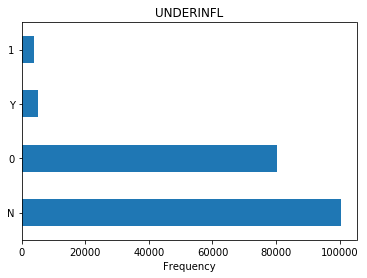

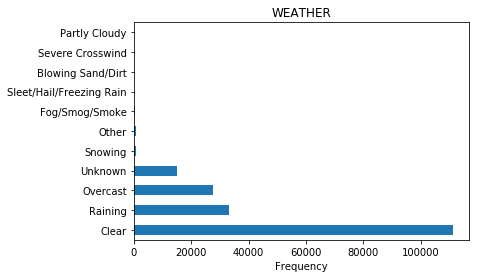

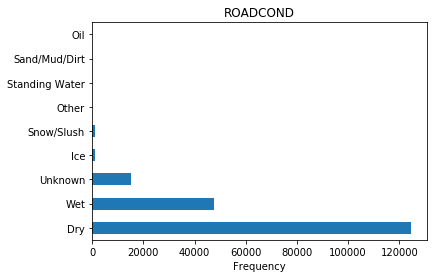

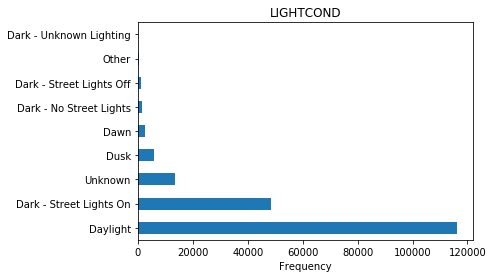

In [62]:
attribute = ['UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']
for atb in attribute:
    chart = df[atb].value_counts().plot(kind='barh')
    plt.gca().set(title=atb, xlabel='Frequency');
    plt.show()

In [63]:
##DATA PREPROCESSING

##categorizing/labeling

df['UNDERINFL'].replace({'N':'0','Y':'1'},inplace = True) #relabeling under-influence column

#categorizing weather column
normal_weather = ['Clear','Partly Cloudy']
extreme_weather = ['Raining','Overcast','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind']
for nor_weather in normal_weather:
    df['WEATHER'].replace({nor_weather:'normal'},inplace = True)
for ext_weather in extreme_weather:
    df['WEATHER'].replace({ext_weather:'extreme'},inplace = True)

#categorizing roadcond column
extreme_roadcond = ['Wet','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil']
for ext_roadcond in extreme_roadcond:
    df['ROADCOND'].replace({ext_roadcond:'extreme'},inplace = True)

#categorizing lightcond column
low_light = ['Dark - Street Lights On','Dusk','Dawn','Other','Dark - Unknown Lighting']
no_light = ['Dark - No Street Lights','Dark - Street Lights Off']
for low_light in low_light:
    df['LIGHTCOND'].replace({low_light:'low_light'},inplace = True)
for no_light in no_light:
    df['LIGHTCOND'].replace({no_light:'dark'},inplace = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [64]:
#checking highest frequency value
print(df.describe(include='all'))

#replace unknown highest freq. value
top_freqency_values = ['0','normal','Dry','Daylight']
for a,tf in zip(attribute,top_freqency_values):
    df[a].replace({'Unknown':tf},inplace = True)
    
#remove rows with n/a
df.dropna(0,'any',inplace=True)

         SEVERITYCODE UNDERINFL WEATHER ROADCOND LIGHTCOND
count   194673.000000    189789  189592   189661    189503
unique            NaN         2       3        3         4
top               NaN         0  normal      Dry  Daylight
freq              NaN    180668  111140   124510    116137
mean         1.298901       NaN     NaN      NaN       NaN
std          0.457778       NaN     NaN      NaN       NaN
min          1.000000       NaN     NaN      NaN       NaN
25%          1.000000       NaN     NaN      NaN       NaN
50%          1.000000       NaN     NaN      NaN       NaN
75%          2.000000       NaN     NaN      NaN       NaN
max          2.000000       NaN     NaN      NaN       NaN


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


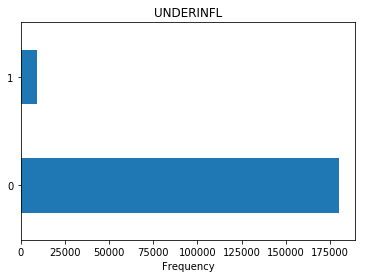

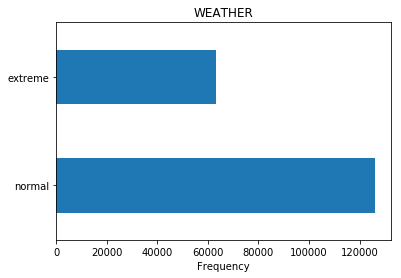

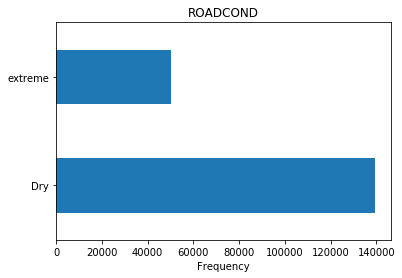

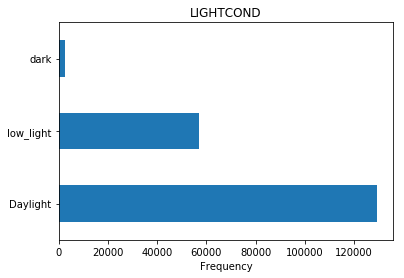

In [65]:
for atb in attribute:
    chart = df[atb].value_counts().plot(kind='barh')
    plt.gca().set(title=atb, xlabel='Frequency');
    plt.show()

In [66]:
for columns in list(df):
    print('----')
    print(columns)
    print('counting na:',df[columns].isna().sum())
    print('value counting:')
    print(df[columns].value_counts())

----
SEVERITYCODE
counting na: 0
value counting:
1    132285
2     57052
Name: SEVERITYCODE, dtype: int64
----
UNDERINFL
counting na: 0
value counting:
0    180239
1      9098
Name: UNDERINFL, dtype: int64
----
WEATHER
counting na: 0
value counting:
normal     126052
extreme     63285
Name: WEATHER, dtype: int64
----
ROADCOND
counting na: 0
value counting:
Dry        139331
extreme     50006
Name: ROADCOND, dtype: int64
----
LIGHTCOND
counting na: 0
value counting:
Daylight     129533
low_light     57077
dark           2727
Name: LIGHTCOND, dtype: int64


In [42]:
##data balancing
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['SEVERITYCODE']==1]
df_minority = df[df['SEVERITYCODE']==2]

#downsample method
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                  replace=False,    # sample without replacement
                                  n_samples=57052,     # to match minority class
                                  random_state=123) # reproducible results
# Combine minority class with downsampled majority class
df_down = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
print(df_down['SEVERITYCODE'].value_counts())

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64


In [43]:
#declare 'X' as the Feature Matrix (data of df) and 'y' as the response vector (target)
y = df_down['SEVERITYCODE']
X = df_down[attribute].values
print(X[0:5])

[['0' 'normal' 'Dry' 'Daylight']
 ['0' 'normal' 'Dry' 'Daylight']
 ['0' 'normal' 'Dry' 'Daylight']
 ['0' 'extreme' 'Dry' 'Daylight']
 ['0' 'extreme' 'extreme' 'low_light']]


In [44]:
##convert categorial values into to numerical ones for modelling
from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['normal','extreme'])
X[:,1] = le_weather.transform(X[:,1]) #column no.1 (started from 0)

le_roadcond = preprocessing.LabelEncoder()
le_roadcond.fit([ 'Dry', 'extreme'])
X[:,2] = le_roadcond.transform(X[:,2])

le_lightcond = preprocessing.LabelEncoder()
le_lightcond.fit([ 'Daylight', 'low_light', 'dark'])
X[:,3] = le_lightcond.transform(X[:,3]) 

print(X[0:5])

[['0' 1 0 0]
 ['0' 1 0 0]
 ['0' 1 0 0]
 ['0' 0 0 0]
 ['0' 0 1 2]]


In [45]:
##normalizing data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[0:5])

[[-0.23455095  0.71999332 -0.60921726 -0.67424653]
 [-0.23455095  0.71999332 -0.60921726 -0.67424653]
 [-0.23455095  0.71999332 -0.60921726 -0.67424653]
 [-0.23455095 -1.38890178 -0.60921726 -0.67424653]
 [-0.23455095 -1.38890178  1.64145055  1.50664516]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [46]:
##train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (79872, 4) (79872,)
Test set: (34232, 4) (34232,)


In [47]:
#MODELLING
#import evaluation methods
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

[0.4952968  0.50581327 0.4964653  0.50505375 0.51022435 0.50788736
 0.5068065  0.51007829 0.51329166 0.51413882 0.51317481 0.51413882
 0.51346693 0.51402197]


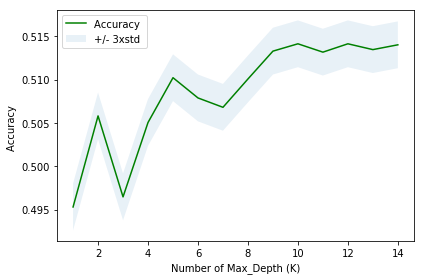

In [50]:
#K-Nearest neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
Ks = 15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max_Depth (K)')
plt.tight_layout()
plt.show()

In [51]:
#k=5 have the highest accuracy, before overfitting.
k = 5
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

[0.5117434  0.52103295 0.52103295 0.52395419 0.52415868 0.52415868
 0.52415868 0.52415868 0.52415868 0.52415868 0.52415868 0.52415868
 0.52415868 0.52415868]


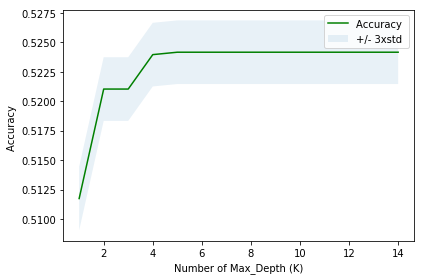

In [52]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Testing K
from sklearn import metrics
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=drugTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max_Depth (K)')
plt.tight_layout()
plt.show()

In [53]:
#Choosing k = 4 in Decision Tree to avoid overfitting
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
#Suppport Vector Machine
from sklearn import svm

for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel).fit(X_train,y_train)
    yhat_clf = clf.predict(X_test)
    print(kernel)
    print('f1_score: ',f1_score(y_test, yhat_clf, average='weighted'))
    print('jaccard_score: ',jaccard_similarity_score(y_test, yhat_clf))

linear
f1_score:  0.5146768655485023
jaccard_score:  0.5235160084131807


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


poly
f1_score:  0.5142642841347481
jaccard_score:  0.5239541949053517


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf
f1_score:  0.5145423531520703
jaccard_score:  0.5241586819350316


In [67]:
#linear kernel performs the best
clf = svm.SVC(kernel='rbf').fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [68]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

for solver in ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'):
    LR = LogisticRegression(C=0.01, solver= solver).fit(X_train,y_train)
    yhat_LR = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    print(solver)
    print(classification_report(y_test, yhat_LR))
    print('f1_score: ',f1_score(y_test, yhat_LR, average='weighted'))
    print('jaccard_score: ',jaccard_similarity_score(y_test, yhat_LR))
    print('log_loss: ',log_loss(y_test, yhat_prob))

newton-cg
              precision    recall  f1-score   support

           1       0.52      0.66      0.58     17194
           2       0.53      0.39      0.45     17038

   micro avg       0.52      0.52      0.52     34232
   macro avg       0.52      0.52      0.51     34232
weighted avg       0.52      0.52      0.51     34232

f1_score:  0.5146768655485023
jaccard_score:  0.5235160084131807
log_loss:  0.6914721094365698
lbfgs
              precision    recall  f1-score   support

           1       0.52      0.66      0.58     17194
           2       0.53      0.39      0.45     17038

   micro avg       0.52      0.52      0.52     34232
   macro avg       0.52      0.52      0.51     34232
weighted avg       0.52      0.52      0.51     34232

f1_score:  0.5146768655485023
jaccard_score:  0.5235160084131807
log_loss:  0.6914721882802186
liblinear
              precision    recall  f1-score   support

           1       0.52      0.66      0.58     17194
           2       0.

In [69]:
#liblinear solver perform the best due to its lowest log loss
LR = LogisticRegression(C=0.01, solver= 'sag').fit(X_train,y_train)

In [70]:
#MODEL EVALUATION

yhat_KNN = kNN_model.predict(X_test)
print('KNN_f1_score: ',f1_score(y_test, yhat_KNN, average='weighted'))
print('KNN_jaccard_score: ',jaccard_similarity_score(y_test, yhat_KNN))

yhat_Tree = drugTree.predict(X_test)
print('Tree_f1_score: ',f1_score(y_test, yhat_Tree, average='weighted'))
print('Tree_jaccard_score: ',jaccard_similarity_score(y_test, yhat_Tree))

yhat_clf = clf.predict(X_test)
print('SVM_f1_score: ',f1_score(y_test, yhat_clf, average='weighted'))
print('SVM_jaccard_score: ',jaccard_similarity_score(y_test, yhat_clf))

yhat_LR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print('LR_f1_score: ',f1_score(y_test, yhat_LR, average='weighted'))
print('LR_jaccard_score: ',jaccard_similarity_score(y_test, yhat_LR))
print('LR_log_loss: ',log_loss(y_test, yhat_prob))

KNN_f1_score:  0.4826883616296114
KNN_jaccard_score:  0.5102243514839916
Tree_f1_score:  0.5148995756329575
Tree_jaccard_score:  0.5239541949053517
SVM_f1_score:  0.5145423531520703
SVM_jaccard_score:  0.5241586819350316
LR_f1_score:  0.5146768655485023
LR_jaccard_score:  0.5235160084131807
LR_log_loss:  0.69147217980194


In [ ]:
#LR and SVM have similar accuracy, but LR perform significantly faster